In [1]:
# https://www.kaggle.com/competitions/colombian-ai-olympiad-2025-pr-1-heart-attack/overview
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
train = pd.read_csv("/kaggle/input/colombian-ai-olympiad-2025-pr-1-heart-attack/train.csv")
test = pd.read_csv("/kaggle/input/colombian-ai-olympiad-2025-pr-1-heart-attack/test.csv")

train.drop(columns=['cholesterol_change'], inplace=True)
test.drop(columns=['cholesterol_change'], inplace=True)

In [4]:
diet_mapper = {
    'poor': 0,
    'average': 1,
    'good': 2
}

stress_mapper = {
    'low': 0,
    'medium': 1,
    'high': 2
}

train['diet_quality'] = train['diet_quality'].map(diet_mapper.get)
test['diet_quality'] = test['diet_quality'].map(diet_mapper.get)

train['stress_level'] = train['stress_level'].map(stress_mapper.get)
test['stress_level'] = test['stress_level'].map(stress_mapper.get)

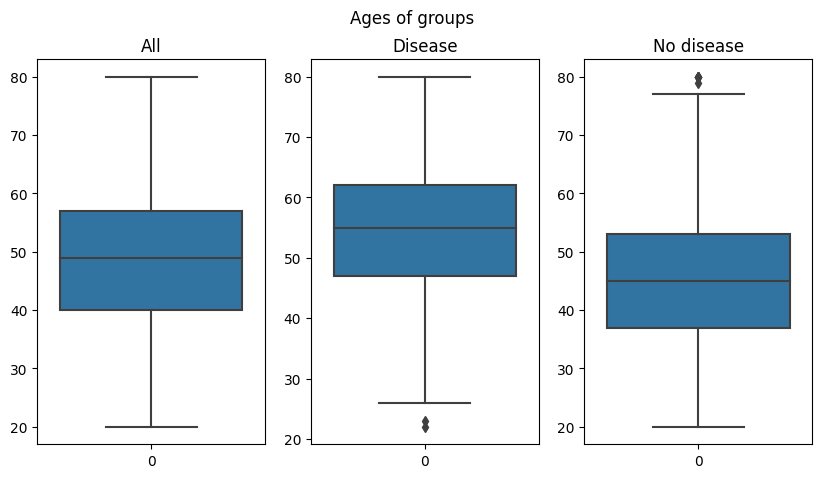

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('All')
sns.boxplot(train['age'])

plt.subplot(1, 3, 2)
plt.title('Disease')
sns.boxplot(train[train['heart_disease_risk']==1].reset_index(drop=True)['age'])

plt.subplot(1, 3, 3)
plt.title('No disease')
sns.boxplot(train[train['heart_disease_risk']==0].reset_index(drop=True)['age'])

plt.suptitle('Ages of groups')
plt.show()

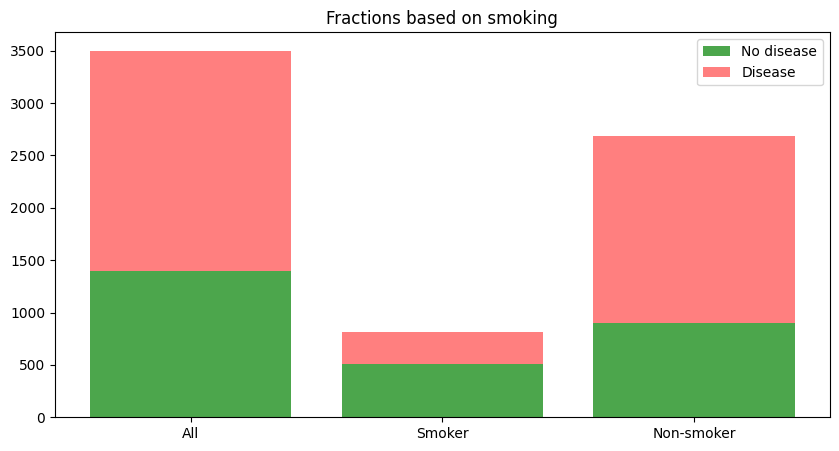

In [16]:
categories = ['All', 'Smoker', 'Non-smoker']
positives = [train['heart_disease_risk'].sum(), train[train['smoker']==1]['heart_disease_risk'].sum(), train[train['smoker']==0]['heart_disease_risk'].sum()]

negatives = [
    len(train['heart_disease_risk'])-train['heart_disease_risk'].sum(), 
    len(train[train['smoker']==1]['heart_disease_risk'])-train[train['smoker']==1]['heart_disease_risk'].sum(),
    len(train[train['smoker']==0]['heart_disease_risk'])-train[train['smoker']==0]['heart_disease_risk'].sum()
]

plt.figure(figsize=(10, 5))
plt.title('Fractions based on smoking')
plt.bar(categories, positives, color='g', alpha=0.7, label='No disease')
plt.bar(categories, negatives, bottom=positives, color='r', alpha=0.5, label='Disease')
plt.legend()

plt.show()

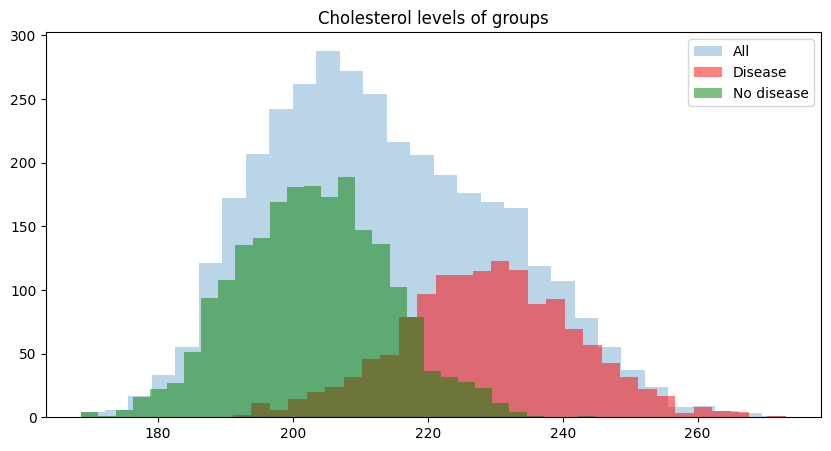

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Cholesterol levels of groups')

plt.hist(train['cholesterol'], alpha=0.3, bins=30, label='All')

plt.hist(train[train['heart_disease_risk']==1]['cholesterol'], color='r', alpha=0.5, bins=30, label='Disease')

plt.hist(train[train['heart_disease_risk']==0]['cholesterol'], color='g', alpha=0.5, bins=30, label='No disease')

plt.legend()
plt.show()

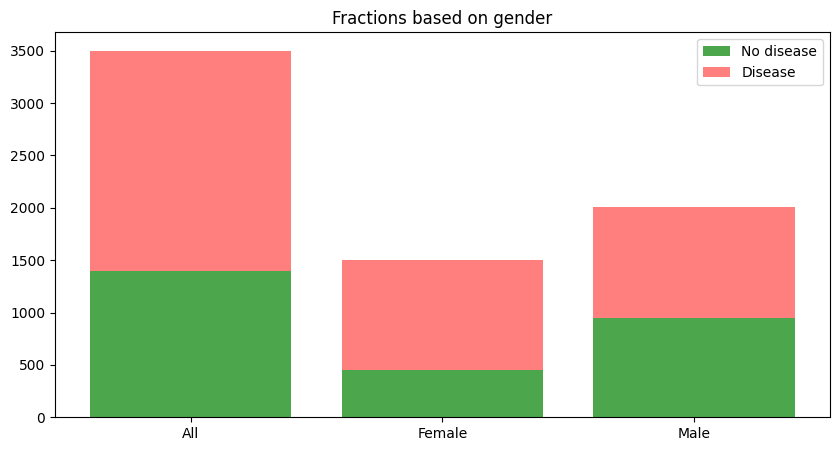

In [19]:
categories = ['All', 'Female', 'Male']
positives = [train['heart_disease_risk'].sum(), train[train['gender']==0]['heart_disease_risk'].sum(), train[train['gender']==1]['heart_disease_risk'].sum()]

negatives = [
    len(train['heart_disease_risk'])-train['heart_disease_risk'].sum(), 
    len(train[train['gender']==0]['heart_disease_risk'])-train[train['gender']==0]['heart_disease_risk'].sum(),
    len(train[train['gender']==1]['heart_disease_risk'])-train[train['gender']==1]['heart_disease_risk'].sum()
]

plt.figure(figsize=(10, 5))
plt.title('Fractions based on gender')
plt.bar(categories, positives, color='g', alpha=0.7, label='No disease')
plt.bar(categories, negatives, bottom=positives, color='r', alpha=0.5, label='Disease')
plt.legend()

plt.show()

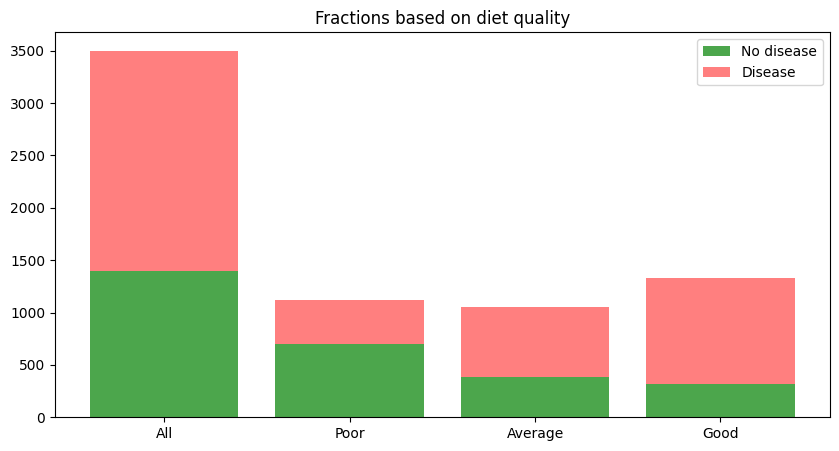

In [25]:
categories = ['All', 'Poor', 'Average', 'Good']
positives = [
    train['heart_disease_risk'].sum(),
    train[train['diet_quality']==0]['heart_disease_risk'].sum(),
    train[train['diet_quality']==1]['heart_disease_risk'].sum(),
    train[train['diet_quality']==2]['heart_disease_risk'].sum()
]

negatives = [
    len(train['heart_disease_risk'])-train['heart_disease_risk'].sum(),
    len(train[train['diet_quality']==0]['heart_disease_risk'])-train[train['diet_quality']==0]['heart_disease_risk'].sum(),
    len(train[train['diet_quality']==1]['heart_disease_risk'])-train[train['diet_quality']==1]['heart_disease_risk'].sum(),
    len(train[train['diet_quality']==2]['heart_disease_risk'])-train[train['diet_quality']==2]['heart_disease_risk'].sum()
]

plt.figure(figsize=(10, 5))
plt.title('Fractions based on diet quality')
plt.bar(categories, positives, color='g', alpha=0.7, label='No disease')
plt.bar(categories, negatives, bottom=positives, color='r', alpha=0.5, label='Disease')
plt.legend()

plt.show()

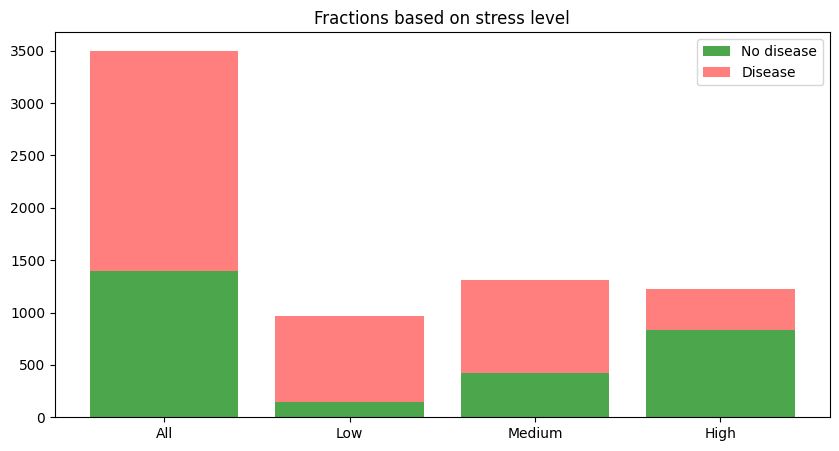

In [40]:
categories = ['All', 'Low', 'Medium', 'High']
positives = [
    train['heart_disease_risk'].sum(),
    train[train['stress_level']==0]['heart_disease_risk'].sum(),
    train[train['stress_level']==1]['heart_disease_risk'].sum(),
    train[train['stress_level']==2]['heart_disease_risk'].sum()
]

negatives = [
    len(train['heart_disease_risk'])-train['heart_disease_risk'].sum(),
    len(train[train['stress_level']==0]['heart_disease_risk'])-train[train['stress_level']==0]['heart_disease_risk'].sum(),
    len(train[train['stress_level']==1]['heart_disease_risk'])-train[train['stress_level']==1]['heart_disease_risk'].sum(),
    len(train[train['stress_level']==2]['heart_disease_risk'])-train[train['stress_level']==2]['heart_disease_risk'].sum()
]

plt.figure(figsize=(10, 5))
plt.title('Fractions based on stress level')
plt.bar(categories, positives, color='g', alpha=0.7, label='No disease')
plt.bar(categories, negatives, bottom=positives, color='r', alpha=0.5, label='Disease')
plt.legend()

plt.show()

<Axes: >

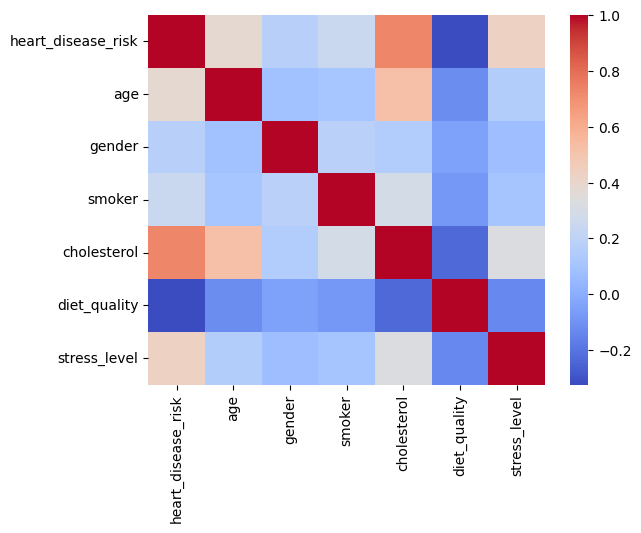

In [38]:
sns.heatmap(train.drop(columns=['id']).corr(), cmap='coolwarm')

In [59]:
train = pd.read_csv("/kaggle/input/colombian-ai-olympiad-2025-pr-1-heart-attack/train.csv")
test = pd.read_csv("/kaggle/input/colombian-ai-olympiad-2025-pr-1-heart-attack/test.csv")

In [60]:
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,heart_disease_risk,age,gender,smoker,cholesterol,cholesterol_change,diet_quality,stress_level
0,ID_2788,0,51,0,0,189.0,3.3,average,low
1,ID_1230,0,55,1,0,209.6,NaN,average,medium
2,ID_774,0,44,0,0,186.1,4.4,average,medium
3,ID_2567,0,59,0,0,200.6,NaN,good,low
4,ID_3614,1,57,1,0,229.4,5.7,poor,high
...,...,...,...,...,...,...,...,...,...
3495,ID_3028,1,63,1,0,210.2,4.3,good,high
3496,ID_2769,0,69,1,1,232.2,14.9,average,low
3497,ID_2646,0,33,0,0,189.9,NaN,average,low
3498,ID_4525,1,61,0,0,218.7,3.3,poor,high


In [63]:
from sklearn.model_selection import train_test_split

features = ['age', 'gender', 'smoker', 'cholesterol', 'diet_quality', 'stress_level']
cat_features = ['diet_quality', 'stress_level']

X, y = train[features], train['heart_disease_risk']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [65]:
from catboost import Pool

train_pool = Pool(X_train, y_train, cat_features=cat_features)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)

In [75]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=161,
    metric_period=20,
    loss_function='Logloss',
    eval_metric='F1',
    max_depth=4
)

model.fit(train_pool, eval_set=valid_pool)

Learning rate set to 0.090446
0:	learn: 0.8431282	test: 0.8125000	best: 0.8125000 (0)	total: 1.57ms	remaining: 252ms
20:	learn: 0.8567518	test: 0.8239564	best: 0.8239564 (20)	total: 21.6ms	remaining: 144ms
40:	learn: 0.8744865	test: 0.8581952	best: 0.8581952 (40)	total: 41ms	remaining: 120ms
60:	learn: 0.8795620	test: 0.8597786	best: 0.8597786 (60)	total: 60.8ms	remaining: 99.6ms
80:	learn: 0.8808763	test: 0.8655617	best: 0.8655617 (80)	total: 92.6ms	remaining: 91.5ms
100:	learn: 0.8804745	test: 0.8655617	best: 0.8655617 (80)	total: 111ms	remaining: 65.9ms
120:	learn: 0.8811700	test: 0.8639706	best: 0.8655617 (80)	total: 131ms	remaining: 43.2ms
140:	learn: 0.8841241	test: 0.8660550	best: 0.8660550 (140)	total: 150ms	remaining: 21.3ms
160:	learn: 0.8850365	test: 0.8702011	best: 0.8702011 (160)	total: 169ms	remaining: 0us

bestTest = 0.8702010969
bestIteration = 160



In [76]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_valid)
f1 = f1_score(y_valid, y_pred)
print(f"F1 Score: {f1:.5f}")

F1 Score: 0.87020


In [77]:
X_test = test[features]
predictions = model.predict(X_test)

subm = pd.DataFrame({
    'id': test['id'],
    'heart_disease_risk': predictions
})

subm.to_csv("submission.csv", index=False)
subm

,id,heart_disease_risk
0,ID_746,1
1,ID_4545,0
2,ID_3648,0
3,ID_3558,0
4,ID_1401,0
...,...,...
1495,ID_3768,0
1496,ID_2258,0
1497,ID_4641,0
1498,ID_2744,0


In [78]:
subm['heart_disease_risk'].value_counts()

heart_disease_risk
0    947
1    553
Name: count, dtype: int64